In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_boston

In [3]:
X, y = load_boston(return_X_y=True)

In [32]:
X, y, features, info, _=load_boston()

In [33]:
boston_dict=load_boston()

In [149]:
data = boston_dict['data']
target = boston_dict['target']
feature_names = boston_dict['feature_names']
info = boston_dict['DESCR']

In [150]:
df = pd.DataFrame(data=data, columns=[feature_names])
df['ONE'] = 1
df['PRICE'] = target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ONE,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,36.2


In [333]:
X = df[feature_names].copy()
X['ONE'] = 1
X = X.values
X = X/X.max(axis=0)


y=target
y=y/max(y)
y=y.reshape((-1,1))

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 4, random_state = 11)

In [509]:
n_train=X_train.shape[0]
n_test=X_test.shape[0]
m=X_train.shape[1]
print(n_train, n_test, m)

4 502 14


In [510]:
def objective(X, w):
    y_hat = np.dot(X, w)
    return y_hat

def cost(y, y_hat, w, n):
    #y_hat = objective()
    cost = np.sum((y-y_hat)**2)/n + _lambda/(2*m) * np.sum(w ** 2)
    return cost

def real_cost(y, y_hat, w, n):
    #y_hat = objective()
    cost = np.sum((y-y_hat)**2)/n
    return cost

def optimize(X, y, y_hat, w):
    dw = np.dot((y_hat-y).T, X).T/n + _lambda/m*w
    new_w = w - 0.05 * dw
    return new_w

In [526]:
_lambda=0
w = np.zeros((14,1))
losses=[]
losses_test=[]
for i in range(10000):
    y_hat = objective(X_train, w)
    w = optimize(X_train, y_train, y_hat, w)
    loss = cost(y_train, y_hat, w, n_train)
    losses.append(loss)
    y_hat_test = objective(X_test, w)
    loss_test = cost(y_test, y_hat_test, w, n_test)
    losses_test.append(loss_test)
losses_test=np.array(losses_test)    

In [527]:
losses_test[-1]

0.0463505436877951

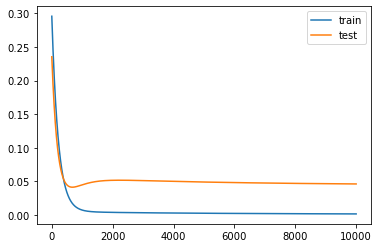

In [528]:
plt.plot(losses, label='train')
plt.plot(losses_test, label='test')
plt.legend()
plt.show()

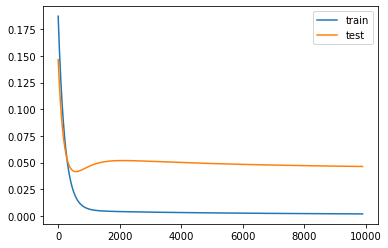

In [532]:
plt.plot(losses[100:], label='train')
plt.plot(losses_test[100:], label='test')
plt.legend()
plt.show()

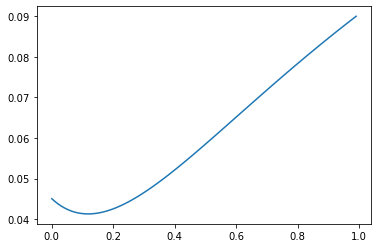

In [537]:
losses=[]
lambdas=[]
for i in range(0, 100):
    #_lambda=0
    _lambda=i/100
    w = np.zeros((14,1))
    #losses=[]
    #losses_test=[]
    for i in range(1000):
        y_hat = objective(X_train, w)
        w = optimize(X_train, y_train, y_hat, w)
    y_hat_test = objective(X_test, w)
    loss=real_cost(y_test, y_hat_test, w, n_test)
    losses.append(loss)
    lambdas.append(_lambda)
plt.plot(lambdas, losses)
plt.show()

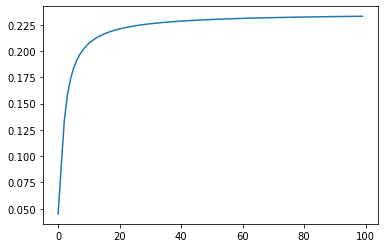

In [534]:
losses=[]
for i in range(0, 100):
    #_lambda=0
    _lambda=i
    w = np.zeros((14,1))
    #losses=[]
    #losses_test=[]
    for i in range(1000):
        y_hat = objective(X_train, w)
        w = optimize(X_train, y_train, y_hat, w)
        #loss = cost(y_train, y_hat, w, n_train)
        #losses.append(loss)
        #
        #loss_test = cost(y_test, y_hat_test, w, n_test)
        #losses_test.append(loss_test)
    y_hat_test = objective(X_test, w)
    loss=real_cost(y_test, y_hat_test, w, n_test)
    losses.append(loss)
plt.plot(losses)
plt.show()